# Laboratory wokrk 1

**Linear image filtering. Highlight the boundaries of objects.**

## Modul

In [1]:
print(1)

import cv2
import numpy as np
from matplotlib import pyplot as plt
import time

import pandas as pd

1


## Second PArt

In [2]:
img = cv2.imread('./foto_before/photo_plush_toys_1.png')
# img = cv2.imread('Screenshot 2025-02-15 at 20.47.12.png')
img_2 = cv2.imread('butterfly-9388717_1280.png')
img_2_D = cv2.imread('ai-generated-9390375_1280.png')
# cv2.imshow('./foto_before/photo_plush_toys_1.png', img)

# cv2.waitKey(0)
# cv2.destroyAllWindows

In [3]:
data = np.array(img)
data_list = img.tolist()

### Task A 

- виконує інвертування кольорової інтенсивності пікселів завантаженого користувачем зображення. Вивести вхідне та отримане зображення;

- inverts the color intensity of the pixels of the image uploaded by the image uploaded by the user. Print the input and the resulting image;

In [4]:
def a_task(data):
    return [[[255 - k for k in j] for j in i] for i in data]  #row i, column -j, pixel value - k

In [5]:
def a_inversion_2(data):
    return 255 - data

In [6]:
def a_inversion_3(image, kernel):

    output = np.zeros_like(image, dtype=np.float64)
    padded_image = np.pad(image, ((1,1), (1,1), (0,0)), mode='edge')

    for i in range(len(image)):
        for j in range(len(image[0])):
            for k in range (3):
                region = padded_image[i:i + kernel.shape[0], j:j + kernel.shape[1]] 
                output[i, j, k] = np.sum(region[:,:,k] * kernel)
  

    return output.astype(np.uint8)

#### Comparison

In [7]:
result = []

In [8]:
start_time = time.time()

img_inverion = a_task(data_list)
img_inverion = np.array(img_inverion, dtype=np.uint8)

end_time = time.time()
result.append(['a_task', end_time-start_time])

cv2.imwrite('./photo_result/img_inverion_1.png', img_inverion)


True

In [9]:
start_time = time.time()

img_inversion_2 = a_inversion_2(data)

end_time = time.time()
result.append(['a_inversion_2', end_time-start_time])

cv2.imwrite('./photo_result/img_inverion_2.png', img_inversion_2)

True

In [10]:
start_time = time.time()

kernel = np.array([[0, 0, 0], [0, -1, 0], [0, 0, 0]])  
kernel = np.flipud(np.fliplr(kernel)) 

img_inversion_3 = a_inversion_3(img, kernel)

end_time = time.time()
result.append(['img_inversion_3', end_time-start_time])

cv2.imwrite('./photo_result/img_inversion_3.png', img_inversion_3)

True

In [11]:
start_time = time.time()

inverted_image = cv2.bitwise_not(img)

end_time = time.time()
result.append(['cv2', end_time-start_time])

cv2.imwrite('./photo_result/img_inversion_4.png', inverted_image)

True

In [12]:
df = pd.DataFrame(result, columns=['Function', 'Time'])
df_table = df.style.background_gradient(subset=["Time"], cmap="RdYlGn_r", vmin=0, vmax=15)
df_table

,Function,Time
0,a_task,0.839869
1,a_inversion_2,0.001497
2,img_inversion_3,17.806158
3,cv2,0.005601


### Task B

- для деякої (однієї з трьох) компонент виконує зміну, наприклад, до кожного пікселя додає якесь постійне значення. Вивести усі зображення в об’єкти типу ImageView.

- for some (one of the three) component performs a change, for example, adds a constant value to each pixel. Print all images in objects of type ImageView.

In [13]:
def changing_blue(img):

    plus = 30
    # output = np.zeros_like(img, dtype=np.float64)
    result = img.copy().astype(np.uint16)
    for i in range(len(img)):
        for j in range(len(img[0])):
            # for k in range (3):
            #     if k == 3:
             
            #  if (j + i) % 2 == 0:
            #     result[i, j] = 0, 0, 0
            
            # result[i][j][0] = img[i][j][0]  
            # result[i][j][1] = img[i][j][1]  
            result[i][j][2] =  min(result[i][j][2] + plus, 255)

            
    return result.astype(np.uint8)

In [14]:
cv2.imshow('Original', img)

img_taskB = changing_blue(img)
cv2.imwrite('./photo_result/img_taskB.png', img_taskB)

cv2.imshow('Result', img_taskB)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Task C

- виконує розбивку зображення на компоненти Red, Green та Blue.
- splits the image into Red, Green, and Blue components.

In [15]:
def components(img):

    red = img.copy()
    green = img.copy()
    blue = img.copy()

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            red[i, j, 1] = 0 
            red[i, j, 0] = 0  

            green[i, j, 0] = 0  
            green[i, j, 2] = 0  

            blue[i, j, 1] = 0  
            blue[i, j, 2] = 0  

    cv2.imshow('original', img)
    cv2.imshow('red', red)
    cv2.imshow('green', green)
    cv2.imshow('blue', blue)

    cv2.waitKey(0)
    cv2.destroyAllWindows()


In [16]:
components(img)

### Task D

- виконує «злиття» двох зображень у певних пропорціях (долях від
одиниці, яка береться за 100%). Наприклад, якщо «вклад» першого зображення у нове складає 0.4, то «вклад» другого – 1-0.4=0.6. У
загальному «вклад» першого зображення позначимо через α, а «вклад»
другого – (1 − α). Тоді шукане зображення можна записати у
наступному вигляді:

Imagenew = α ∙ Image1 + (1 − α)Image2.

За додаткові бали передбачити те, що α – змінна величина, α ∈ (0; 1).
Крок зміни обрати самостійно. Вивести анімацію зображень на екран
програмного застосунку.

In [17]:
def cut(img, img_2):

    img_height, img_width = img.shape[:2]
    img_2_height, img_2_width = img_2.shape[:2]
    
    if img_height > img_2_height or img_width > img_2_width:
        result = img[:img_2_height, :img_2_width]
        result_2 = img_2
    else:
        result = img_2[:img_height, :img_width]
        result_2 = img
        
    return result, result_2


In [18]:
def taskD(img, img_2, a):
    result = img.copy()

    for alfa in np.arange(0, a, 0.1):
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                for k in range(img.shape[2]):

                    ll = alfa*img[i][j][k] + (1-alfa)*img_2[i][j][k]

                    # if ll < 0:
                    #     ll = 0
                    # elif ll > 255:
                    #     ll = 255 
                    result[i][j][k] = ll
        cv2.imshow('Result', result.astype(np.uint8)) 
        cv2.waitKey(1)
    return result.astype(np.uint8)

In [19]:
img_cut_1, img_cut_2 = cut(img_2, img_2_D)

a = 0.4

img_D = taskD(img_cut_1, img_cut_2, a)

cv2.imshow('Result', img_D)
cv2.imshow('First', img_cut_1)
cv2.imshow('Second', img_cut_2)


cv2.waitKey(0)
cv2.destroyAllWindows()

KeyboardInterrupt: 

: 

### Task C

- виконує фільтрацію вхідного зображення з використанням матричних
фільтрів, що описані у лабораторній роботі (фільтр розмиття, фільтр
поліпшення чіткості, медіанний фільтр, фільтр ерозії і нарощування та
фільтр Собеля).

Gaussian density function - func dnirm (density norm) is used to calculate a Gaussian distibution

$$ \text{PDF}(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}} $$

- x is the input value 

- μ is the mean 

- σ is the standard deviation, which controls the "spread" of the Gaussian function.

 Each element in the kernel represents the influence of that pixel on the center pixel, with closer pixels having a greater influence (higher weight) compared to those farther away.

одномерное ядро гауссового ядра (для смягчения краев и уменьшений шума, плавный переход цветов) для равноудаленных точек от центра
сума всех значений в этом ядре = 1 => нормализация

In [ ]:
def dnorm(x, mean=0, std_dev=1):
    return (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)

def gaussian_kernel(size, sigma=1, verbose=True):
    
    kernel_1D = np.linspace(-(size // 2), size // 2, size)
    for i in range(size):
        kernel_1D[i] = dnorm(kernel_1D[i], 0, sigma)
    
    kernel_2D = np.outer(kernel_1D.T, kernel_1D.T)
    kernel_2D /= kernel_2D.sum()  

    if verbose:
        plt.imshow(kernel_2D, interpolation='none', cmap='gray')
        plt.title("Gaussian Kernel")
        plt.colorbar()
        plt.show()
    return kernel_2D

def gaussian(image, kernel_s, sigma=1):

    kernel = gaussian_kernel(kernel_s, sigma)
    pad_size = kernel_s // 2  # свертка без выходя за предел массивааа
    
    result = np.zeros_like(image)

    for channel in range(image.shape[2]): 
        img_w_padd = np.pad(image[..., channel], ((pad_size, pad_size), (pad_size, pad_size)), mode='constant')
        
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                region = img_w_padd[i:i + kernel_s, j:j + kernel_s]
                result[i, j, channel] = np.sum(region * kernel)

    return result

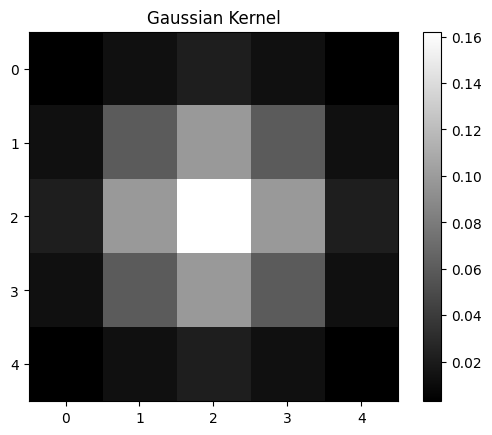

True

In [ ]:
gaussian_img = gaussian(img, 5, sigma=1)
cv2.imwrite('./photo_result/img_gaussian.png', gaussian_img)

In [ ]:
def gaussian_2(image, kernel_size, sigma):
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma)

In [ ]:
gaussian_img_2 = gaussian_2(img, 11, sigma=1)
cv2.imwrite('./photo_result/img_2_gaussian.png', gaussian_img_2)

True

#### фільтр поліпшення чіткості

In [ ]:
def taskE(image):
  
    kernel = np.array([ [-1, -1, -1], [-1,  9, -1], [-1, -1, -1]])
     
    output = np.zeros_like(image, dtype=np.float64)
    
    padded_image = np.pad(image, ((1, 1), (1, 1), (0, 0)), mode='edge')

    for i in range(len(image)):
        for j in range(len(image[0])):
            for k in range(3):  
                region = padded_image[i:i + kernel.shape[0], j:j + kernel.shape[1]] 
                output[i, j, k] = np.sum(region[:, :, k] * kernel)

    output[output < 0] = 0
    output[output > 255] = 255
    
    return output.astype(np.uint8)

In [ ]:
img_Result = taskE(img)
cv2.imshow('фільтр поліпшення чіткості', img_Result)

cv2.waitKey(0)
cv2.destroyAllWindows()

### медіанний фільтр

In [ ]:
def taskE_2(image, kernel):

    output = np.zeros_like(image, dtype=np.float64)
    size = kernel//2

    if image.ndim == 2:
        padded_image = np.pad(image, ((size, size), (size, size)), mode='edge')
    else:
        padded_image = np.pad(image, ((size, size), (size, size), (0, 0)), mode='edge')

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            matrix = padded_image[i:i + kernel, j:j + kernel]
            for k in range(image.shape[2]):
                output[i, j, k] = np.median(matrix[:, :, k])

    return output.astype(np.uint8)

In [ ]:
img_res_2 = taskE_2(img, 3)

cv2.imshow('median', img_res_2)

cv2.waitKey(0)
cv2.destroyAllWindows()

### Erosion

Erosion is used to **remove pixels** from the boundary of the input image shrinking the object.

Erosion operator takes two inputs, one is the image and the other one is the structuring element. The structuring element determines the effect of erosion on the input image.

In [ ]:
def function(image, k):
    height, width = image.shape
    k_height, k_width = k.shape
    pad_h, pad_w = k_height // 2, k_width // 2
    
    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)
    result = np.zeros_like(image, dtype=np.uint8)
    return height, width, padded_image, result, k_height, k_width

In [ ]:
def erosion(image, k):
    
    height, width, padded_image, result, k_height, k_width = function(image, k)

    for i in range(height):
        for j in range(width):
            l = padded_image[i:i + k_height, j:j + k_width]
            
            if np.all(l[k == 1] == 1):  
                result[i, j] = 1
    
    return result

In [ ]:
gray = cv2.imread('./foto_before/photo_plush_toys_1.png', cv2.IMREAD_GRAYSCALE)
_, binary_image = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
kernel = np.array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]], np.uint8)


erosion_img = erosion(binary_image, kernel)

cv2.imshow('Erosion', erosion_img )

cv2.waitKey(0)
cv2.destroyAllWindows()

### Sobel

The Sobel Edge Detector is a convolution-based method used for edge detection in images. It employs convolution with Sobel kernels to approximate the gradient of the image intensity. Instead of 2x2 kernels(it is used in Roberts Cross Detector), Sobel utilizes two 3x3 convolution kernels for detecting changes in intensity in the horizontal and vertical directions.

$$ \text{Magnitude} = \sqrt{(\text{grad}_x)^2 + (\text{grad}_y)^2} $$

In [ ]:
def sobel_filter(image):

    gorizontal = np.array([[-1, 0, 1],
                         [-2, 0, 2],
                         [-1, 0, 1]])
    
    vertical = np.array([[1, 2, 1],
                         [0, 0, 0],
                         [-1, -2, -1]])

    height, width, _ = image.shape
    pad_size = 1
    padded_image = np.pad(image, ((pad_size, pad_size), (pad_size, pad_size), (0, 0)), mode='constant')
    
    result = np.zeros((height, width, 3))

    for c in range(3):  
        for i in range(height):
            for j in range(width):
                
                region = padded_image[i:i + 3, j:j + 3, c]
                grad_x = np.sum(region * gorizontal)
                grad_y = np.sum(region * vertical)
                result[i, j, c] = np.clip(np.sqrt(grad_x**2 + grad_y**2), 0, 255)

    return result.astype(np.uint8)

In [ ]:
sobel_result = sobel_filter(img)

cv2.imshow('sobel_result', sobel_result)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
kernel = np.ones((5, 5), np.uint8)
erosion = cv2.erode(img, kernel, iterations=1)
dilation = cv2.dilate(img, kernel, iterations=1)

cv2.imshow('erosion_result', dilation)
cv2.imshow('dilation_result', dilation)


cv2.waitKey(0)
cv2.destroyAllWindows()


# and smth new

In [ ]:
import cv2
import numpy as np

In [ ]:
video = 'videoplayback7.mp4'
output_image_path = 'output_image.png'
k = 5  

cap = cv2.VideoCapture(video)

shot = []
count = 0

while(cap.isOpened()):
    ret, frame = cap.read()
    if not ret:
        break 
    
    shot.append(frame)
    count += 1

k_frames = []

for i in range(0, count, k):
    k_frames.append(shot[i])

result = np.median(k_frames, axis=0).astype(np.uint8)

cv2.imwrite('result_smth_new.png', result)

cap.release()
print("віііі", count)

віііі 1800
